I FOUND IT IN: 9  ITERATIONS


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelap

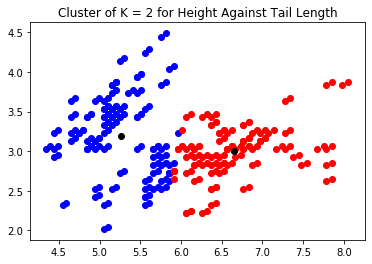

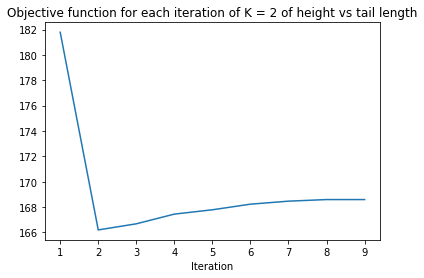

I FOUND IT IN: 15  ITERATIONS


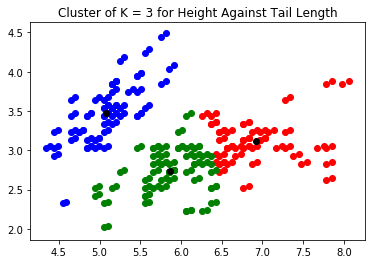

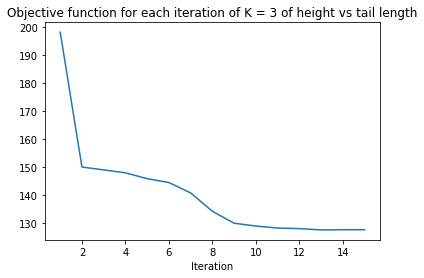

I FOUND IT IN: 6  ITERATIONS


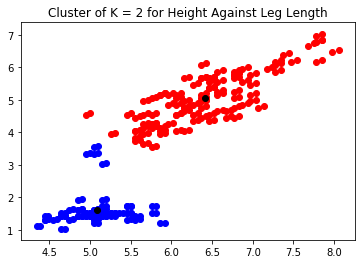

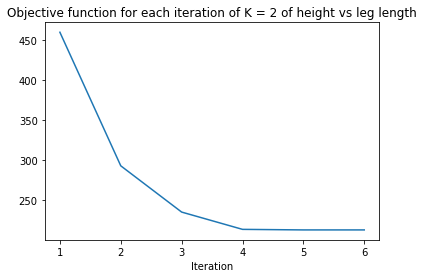

I FOUND IT IN: 12  ITERATIONS


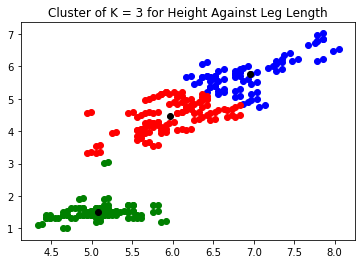

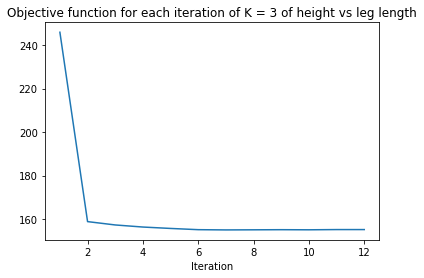

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np

data = pd.DataFrame.from_csv('MLData2.csv')
data.reset_index(level=0, inplace=True)

data = data.sort_values(by='height')


heightData = data['height'].as_matrix()
tailData = data['tail length'].as_matrix()
legData = data['leg length'].as_matrix()
noseData = data['nose circumference'].as_matrix()

def compute_euclidean_distance(point1, point2):
    dist = 0
    for i in range(0, len(point1)):
        dist += (point1[i]-point2[i])**2
    euc = np.sqrt(dist)
    return euc

def initialise_centroids(x, y, k):
    centroids = np.ones([k,2])
    for i in range(0,k):
        rand = np.random.randint(0, (x.size))
        centroids[i][0] = x[rand]
        centroids[i][1] = y[rand]
    
    return centroids

def newCentroids(groups):
    centroids = np.ones([len(groups), 2])
    
    centroids = np.asarray(centroids)
    groups = np.asarray(groups)
    for i in range(0, groups.size):
        groups[i] = np.asarray(groups[i])
    
    for i in range(0,groups.size):
        centroids[i][0] = np.mean(groups[i][:, [0]])
        centroids[i][1] = np.mean(groups[i][:, [1]])
    return centroids

def kmeans(x, y, k):
    done = False
    oldCents = []
    newCents = initialise_centroids(x, y, k)   
    count = 0;
    objectiveFunction = []
      
    while done == False:
        count+= 1                      
        groups = []       
        for m in range(0, k):
            groups.append([])

        sumOfDistance = 0.0


        for i in range (0, len(x)):
            eucValues = []
            for j in range(0, k):
                eucValues.append(compute_euclidean_distance([x[i],y[i]], newCents[j]))

            l = np.argmin(eucValues)
            groups[l].append([x[i], y[i]])
            
            sumOfDistance += eucValues[l]
            
        objectiveFunction.append(sumOfDistance)   
            
        
        if np.all(oldCents == newCents):
            done = True
            print('I FOUND IT IN:', count, ' ITERATIONS')
#            
#            for i in range(0, len(newCents)):
#                print(newCents[i])
        else:
            oldCents = newCents
            newCents = newCentroids(groups)            
            
    return groups, newCents, objectiveFunction
            
##################################################################################################################

colours = ['b', 'r', 'g', 'y', 'm', 'c', '#9132a8', '#ff7105', '#ff05a3']

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

groups, centroids, objectiveFunction = kmeans(heightData, tailData, 2)
groups = np.asarray(groups)
centroids = np.asarray(centroids)
iterationNum = []

for i in range (0, len(objectiveFunction)):
    iterationNum.append(i+1)0


for i in range(0, groups.size):
    groups[i] = np.asarray(groups[i])
    plt.scatter(groups[i][:, [0]], groups[i][:, [1]], c=colours[i])
plt.scatter(centroids[:, [0]], centroids[:, [1]], c='k')
plt.title('Cluster of K = 2 for Height Against Tail Length')
plt.show()

plt.plot(iterationNum, objectiveFunction)
plt.xlabel('Iteration')
plt.title('Objective function for each iteration of K = 2 of height vs tail length')
plt.show()

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

groups, centroids, objectiveFunction = kmeans(heightData, tailData, 3)
groups = np.asarray(groups)
centroids = np.asarray(centroids)
iterationNum = []

for i in range (0, len(objectiveFunction)):
    iterationNum.append(i+1)

for i in range(0, groups.size):
    groups[i] = np.asarray(groups[i])
    plt.scatter(groups[i][:, [0]], groups[i][:, [1]], c=colours[i])
plt.scatter(centroids[:, [0]], centroids[:, [1]], c='k')
plt.title('Cluster of K = 3 for Height Against Tail Length')
plt.show()

plt.plot(iterationNum, objectiveFunction)
plt.xlabel('Iteration')
plt.title('Objective function for each iteration of K = 3 of height vs tail length')
plt.show()

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

groups, centroids, objectiveFunction = kmeans(heightData, legData, 2)
groups = np.asarray(groups)
centroids = np.asarray(centroids)
iterationNum = []

for i in range (0, len(objectiveFunction)):
    iterationNum.append(i+1)

for i in range(0, groups.size):
    groups[i] = np.asarray(groups[i])
    plt.scatter(groups[i][:, [0]], groups[i][:, [1]], c=colours[i])
plt.scatter(centroids[:, [0]], centroids[:, [1]], c='k')
plt.title('Cluster of K = 2 for Height Against Leg Length')
plt.show()

plt.plot(iterationNum, objectiveFunction)
plt.xlabel('Iteration')
plt.title('Objective function for each iteration of K = 2 of height vs leg length')
plt.show()

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

groups, centroids, objectiveFunction = kmeans(heightData, legData, 3)
groups = np.asarray(groups)
centroids = np.asarray(centroids)
iterationNum = []

for i in range (0, len(objectiveFunction)):
    iterationNum.append(i+1)

for i in range(0, groups.size):
    groups[i] = np.asarray(groups[i])
    plt.scatter(groups[i][:, [0]], groups[i][:, [1]], c=colours[i])
plt.scatter(centroids[:, [0]], centroids[:, [1]], c='k')
plt.title('Cluster of K = 3 for Height Against Leg Length')
plt.show()

plt.plot(iterationNum, objectiveFunction)
plt.xlabel('Iteration')
plt.title('Objective function for each iteration of K = 3 of height vs leg length')
plt.show()